# In this code we will use python to investigate the behaviour of the final number remaining after our picking +replacing procedure. We will use simulations for varying n. 

In [1]:
# Imports
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, expon, lognorm

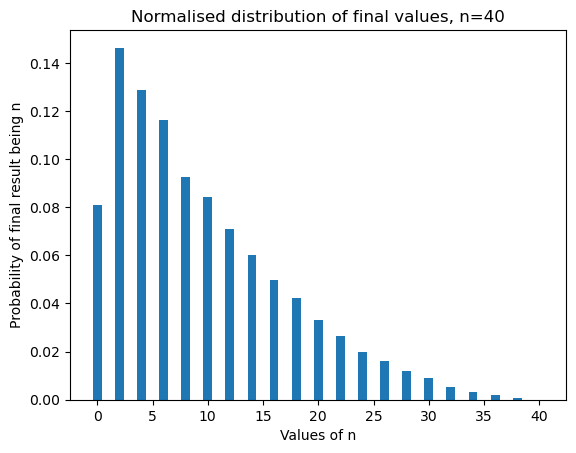

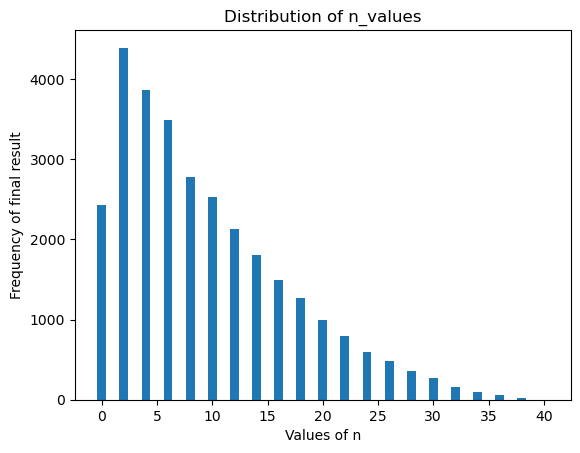

In [2]:
def sim(n):
    """
    Function to Simulate our procedure with the set {1,2.....n}
    Parameters
    ----------
    n: int
        The variable we are considering, in our specific question we are considering n=2024
    
    Returns
    ----------
    res: array(tuple)
        A distribution of return values and the associated counts.  
    """
    # define our original set of n values {1,2,3....n}
    my_list = [i for i in range(1,n+1)]
    for i in range(n-1):
        rand_indices = random.sample(range(0, len(my_list)), 2)
        
        diff = my_list[rand_indices[1]] - my_list[rand_indices[0]]
      
        # delete the maximum index first so we dont ever get an index error second time deleting our element
        del my_list[max(rand_indices)]
        del my_list[min(rand_indices)]
        my_list.append(abs(diff))
        
    res = my_list[0] 
    return res


def results(num_sims,n):
    """
    
    function to simulate  our game num_sims times and plot trends of results
    Parameters
    ----------
    num_sims: int
        The number of simulations we want to run
    n:int
        The variable in the game we are considering
    
    Returns
    ----------
    dist: array(tuple)
        A distribution of return values and the associated counts. 
    
    """
    dist = [0 for i in range(0,n+1)] 
    for i in range(num_sims):
        index = sim(n)
        dist[index] += 1
        
    return dist

def plots(dist,num_sims):
    """
    Function to plot the distribution of our final value. 
    Parameters
    ----------
    dist: List
        List where the index represents the final value and each entry represents the frequency of the number
        as a result
    
    Returns:
    ----------
    None
        
    """
    n_values = [i for i in range(0,len(dist))]
    plt.bar(n_values,dist)
    plt.xlabel("Values of n")
    plt.ylabel("Frequency of final result")
    plt.title("Distribution of n_values")
    plt.show()
    return 



def probability_plots(dist,num_sims):
    """
    Function to plot the probability distribution of our final value. 
    Essentially just normalises the previous histogram. 
    
    Parameters
    ----------
    dist: List
        List where the index represents the final value and each entry represents the frequency of the number
        as a result
    
    Returns:
    ----------
    None
        
    """
    # note length of dist equals 2025
    n_values = [i for i in range(0,len(dist))]
    dist_prob = [dist[i] / num_sims for i in range(len(dist))]
    
    plt.bar(n_values,dist_prob,label="Our data")
    plt.xlabel("Values of n")
    plt.ylabel("Probability of final result being n")
    plt.title(f"Normalised distribution of final values, n={len(dist)-1}")
    plt.show()
    return 

res1 = results(30000,40)

probability_plots(res1,30000)

plots(res1,30000)  

# Comments:
# Note the zero probability at each odd number, this is due to the fact the probability of every odd number is 0. Justification for this is provided in the rubric. 
# As the final value gets larger the probability decreases. This aligns with our intuition that small values have more "paths" that lead to them. 
# Note the shape of the downward trend. It feels exponential. As we are in a discrete setting this suggests to me a Poisson distribution with a small mean may be a good fit for this data. It could also be exponential or lognormal. Finding the underlying distribution of the final value is the main question of this assignment in my opinion. 

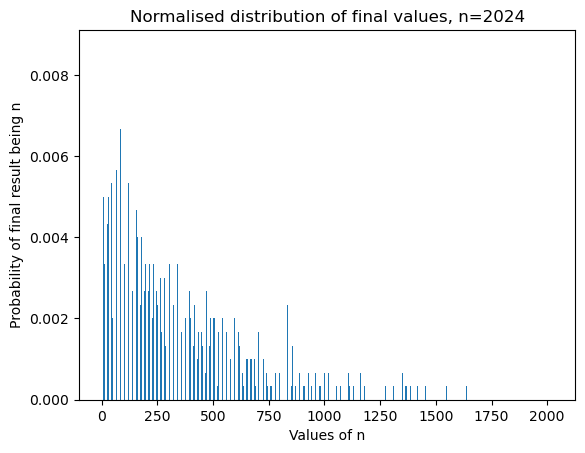

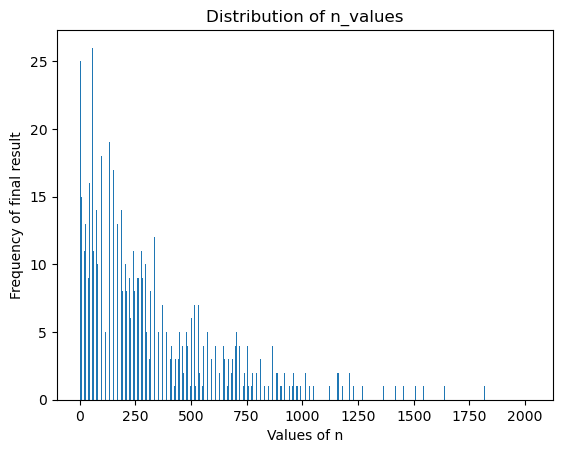

In [3]:
# Here is our specific use case of n = 2024. 
res2 = results(3000,2024)

probability_plots(res2,3000)

plots(res2,3000)

From 3000 simulations there seems to be an exponential relationship to the random variable representing the 
final value. 
I know want to estimate the parameter with which I am going to plot the exponential distribution and poisson distribution. 
The ML-estimate of lambda is simply the mean of the data. I return to the case of n=40 for speed of computation. Note that both 40 and 2024 are both equal to 0 (mod 4)

The calculated mean of our data is: 9.363933333333334
Our array of counts for our simulations is: [2476    0 4333    0 4009    0 3416    0 2913    0 2478    0 2113    0
 1820    0 1510    0 1170    0 1005    0  761    0  653    0  442    0
  318    0  252    0  167    0   97    0   43    0   20    0    4]


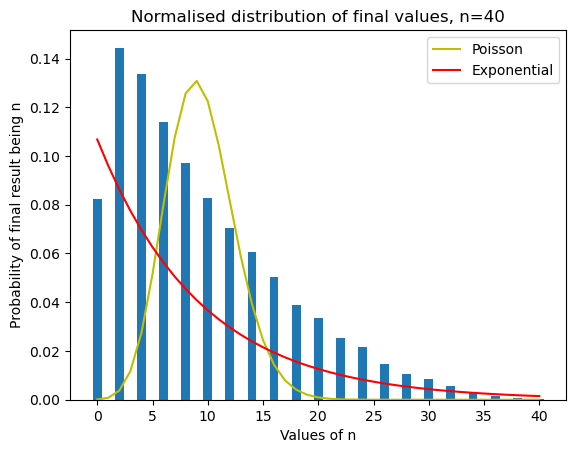

In [4]:
res1 = results(30000,40)

# Sample data (replace with your actual data)
values = np.array([i for i in range(40+1)])
frequencies = np.array(res1)
mean = np.sum(values * frequencies) / np.sum(frequencies)
print(f"The calculated mean of our data is: {mean}")
print(f"Our array of counts for our simulations is: {frequencies}")

    
# Calculate mean and variance

squared_diff = (values - mean)**2
weighted_squared_diff = squared_diff * frequencies
variance = np.sum(weighted_squared_diff) / np.sum(frequencies)


mu_lognormal = np.exp(mean + (variance) / 2)
sigma_lognormal = np.sqrt(np.exp(variance) - 1)



# So I have the mean and the variance of my data.
poisson_expected_values = poisson.pmf(np.arange(len(values)), mean)
exp_values = expon.pdf(np.arange(len(values)), scale=mean)



plt.plot(poisson_expected_values,color="y",label="Poisson")
plt.plot(exp_values,color="r",label="Exponential")
plt.legend()


probability_plots(res1,30000)

# It seems an exponential distribution is a plausible shape. Hence we conjecture that the RV X is exponentially distributed. 

